<a href="https://colab.research.google.com/github/harinadh01/Data-Analysis/blob/main/TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
uploaded = files.upload()

Saving customer_data.csv to customer_data.csv


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64

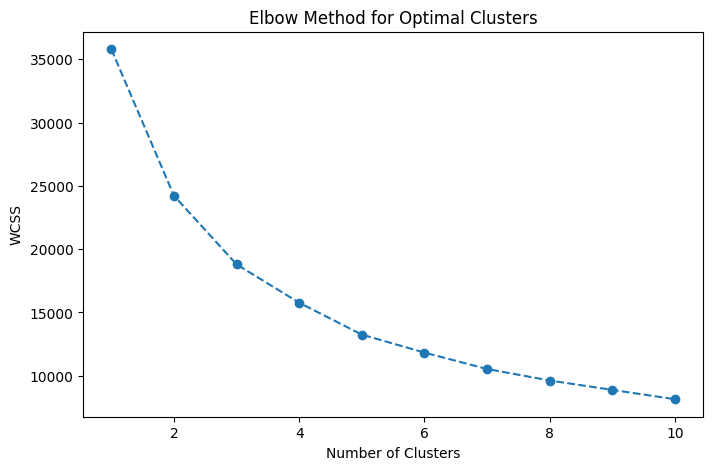

Silhouette Score: 0.43


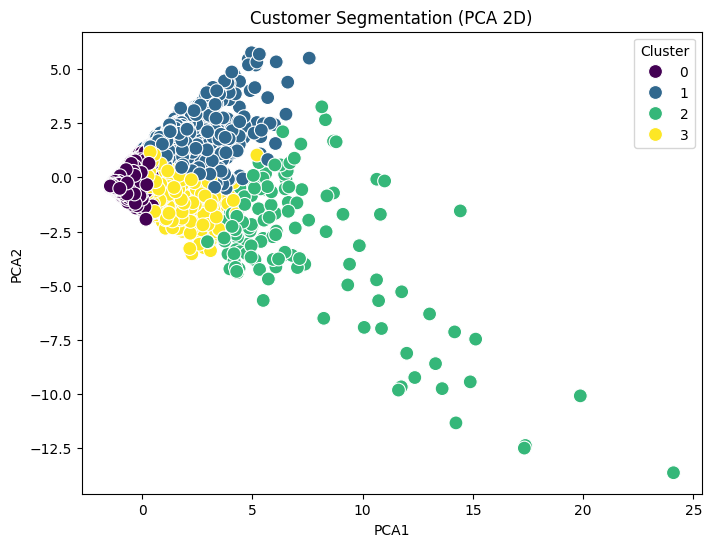


Cluster Distribution:
Cluster
0    5876
3    1904
1    1040
2     130
Name: count, dtype: int64


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the dataset
file_path = "customer_data.csv"  # Ensure the file is in the working directory
df = pd.read_csv("customer_data.csv", delimiter=",")


# Display dataset info
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values and duplicates
print("\nMissing Values:")
print(df.isnull().sum())
df.drop_duplicates(inplace=True)

print(df.columns.tolist())

# Selecting relevant numerical features
features = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']
X = df[features]


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using Elbow Method
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

# Using the optimal number of clusters (assume k=4 based on elbow point)
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate silhouette score
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {sil_score:.2f}")

# Visualizing clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title("Customer Segmentation (PCA 2D)")
plt.show()

# Display cluster counts
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())

# Save clustered dataset
df.to_csv("customer_data_clustered.csv", index=False)
